In [257]:
import numpy as np
import itertools

class Game:
    def __init__(self, num_colors = 6, num_slots = 4):
        self.num_colors = num_colors
        self.num_slots = num_slots

        self.colors = range(num_colors)
        self.possible_slots = list(itertools.product(self.colors, repeat=self.num_slots))
        self.answer = self.possible_slots[np.random.randint(len(self.possible_slots))]
        #print(self.answer)
        #print(self.possible_slots)

    def compare_guess(self, guess, ans = None):
        info = [0,0,0,0]
        if not ans:
            ans = list(self.answer)
            
        for i in range(self.num_slots):
            if guess[i] == ans[i]:
                info[i] = 2
                ans[i] = -1
                guess[i] = -2
        for i in range(self.num_slots):
            if guess[i] in ans:
                info[i] = 1
                ans[ans.index(guess[i])] = -1
                guess[i] = -2
        return sorted(info)

    def analyze_guess(self, guess):
        result = self.compare_guess(guess.copy())
        new_possible_slots = []
        for possible in self.possible_slots:
            pos_info = self.compare_guess(guess.copy(), ans=list(possible).copy())
            if result == pos_info:
                new_possible_slots.append(possible)
        self.possible_slots = new_possible_slots

    def ai_easy(self):
        turns = 0
        while len(self.possible_slots) > 1:
            guess = list(self.possible_slots[np.random.randint(len(self.possible_slots))])
            self.analyze_guess(guess)
            turns += 1
            #print(guess)
            if turns > 100:
                return None
        #print(turns)
        return turns
        
    def ai_med(self, guess = [1,1,2,2]):
        turns = 0
        guess = guess
        while len(self.possible_slots) > 1:
            self.analyze_guess(guess)
            print(guess)
            guess = list(self.possible_slots[np.random.randint(len(self.possible_slots))])
            turns += 1
            
            if turns > 100:
                return 100
        #print(turns)
        return turns
            
            
        

In [258]:
turns = []
for i in range(5):
    game = Game()
    turns.append(game.ai_med())
    print(game.answer, '\n')
    
print(np.mean(turns))


[1, 1, 2, 2]
[3, 1, 0, 2]
[1, 1, 5, 3]
[1, 1, 4, 0]
(1, 1, 1, 0) 

[1, 1, 2, 2]
[0, 0, 3, 3]
[0, 5, 0, 3]
(5, 0, 3, 0) 

[1, 1, 2, 2]
[4, 4, 2, 5]
[0, 1, 3, 4]
[3, 0, 3, 2]
(3, 0, 3, 2) 

[1, 1, 2, 2]
[2, 1, 4, 2]
[0, 1, 2, 1]
(1, 0, 1, 2) 

[1, 1, 2, 2]
[2, 1, 2, 3]
[2, 1, 2, 0]
[2, 1, 2, 4]
(2, 1, 2, 4) 

3.6


{1: 2, 2: 82, 3: 884, 4: 2605, 5: 1313, 6: 112, 7: 2}
7


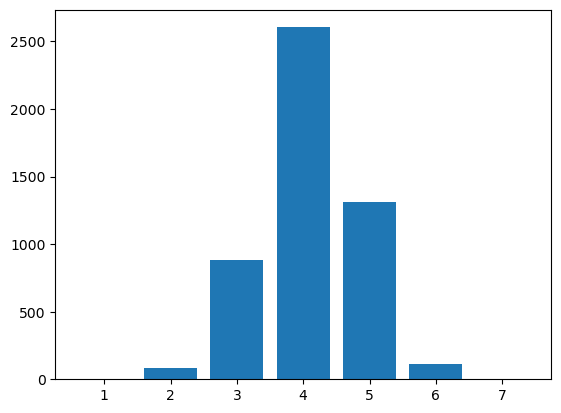

In [251]:
import matplotlib.pyplot as plt
# Example list

# Create a dictionary with counts
counts = {element: turns.count(element) for element in set(turns)}

print(counts)  # Output: {'a': 3, 'b': 2, 'c': 1}
# Plot the histogram
plt.bar(counts.keys(), counts.values())
print(max(turns))
plt.show()

In [230]:
print(min(turns))
print(max(turns))

1
6


In [238]:
help(counts)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Built-in subclasses:
 |      StgDict
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>va